# SPEECH EMOTION RECOGNITION

### IMPORTING LIBRARIES

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import keras
import os
import os.path
import sys

import librosa                                                          #To extract the data from the audio files.
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier                      #For KNN
from sklearn.svm import SVC                                             #For SVM
from sklearn.preprocessing import LabelEncoder                          #For Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio                                       #To play the audio files

### PREPROCESSING THE DATA

#### Defining the path of the dataset files.

In [1]:
Ravdess = "/Users/sanjanathakal/Project/archive/audio_speech_actors_01-24/"
Crema = "/Users/sanjanathakal/Project/AudioWAV/"
Tess = "/Users/sanjanathakal/Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/Users/sanjanathakal/Project/ALL"

#### For dataset 1 : RAVDESS

In [2]:
##For dataset 1 : RAVDESS
import os
import pandas as pd

Ravdess_Dir_list = os.listdir(Ravdess)
emotionfile = []
pathfile = []
for i in Ravdess_Dir_list:
    newpath = os.listdir(Ravdess+i)
    #print(newpath)
    for j in newpath:
        part = j.split('.')[0]
        part = part.split('-')
        emotionfile.append(int(part[2]))
        pathfile.append(Ravdess + i + '/' + j)

emotion_df = pd.DataFrame(emotionfile, columns=['Emotions'])     # Creating a dataframe for emotions.
path_df = pd.DataFrame(pathfile, columns=['Path'])               # Creating a dataframe for path of files.

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Assigning Unique emotion to the integers for the file name
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print("These are the unique emtotions found in this dataset: ", Ravdess_df.Emotions.unique())
print("\nPrinting the data sample :")
Ravdess_df.head()

These are the unique emtotions found in this dataset:  ['angry' 'fear' 'disgust' 'sad' 'surprise' 'happy' 'calm' 'neutral']

Printing the data sample :


,Emotions,Path
0,angry,/Users/sanjanathakal/Project/archive/audio_spe...
1,fear,/Users/sanjanathakal/Project/archive/audio_spe...
2,fear,/Users/sanjanathakal/Project/archive/audio_spe...
3,angry,/Users/sanjanathakal/Project/archive/audio_spe...
4,disgust,/Users/sanjanathakal/Project/archive/audio_spe...


#### For dataset 1 : CREMA-D

In [3]:
import os
import pandas as pd

cremadirectorylist = os.listdir(Crema)

Cemotionfile = []
Cpathfile  = []

for i in cremadirectorylist:
    # storing file paths
    Cpathfile.append(Crema + i)
    # storing file emotions
    part=i.split('_')
    #print(part)
    if part[2] == 'SAD':
        Cemotionfile.append('sad')
    elif part[2] == 'ANG':
        Cemotionfile.append('angry')
    elif part[2] == 'DIS':
        Cemotionfile.append('disgust')
    elif part[2] == 'FEA':
        Cemotionfile.append('fear')
    elif part[2] == 'HAP':
        Cemotionfile.append('happy')
    elif part[2] == 'NEU':
        Cemotionfile.append('neutral')
    else:
        Cemotionfile.append('Unknown')
        

emotion_df = pd.DataFrame(Cemotionfile, columns=['Emotions'])       # Creating a dataframe for emotions.
path_df = pd.DataFrame(Cpathfile, columns=['Path'])                 # Creating a dataframe for path of files.

Crema_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset: ", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Crema_df.head()

These are the unique emtotions found in this dataset:  ['angry' 'neutral' 'disgust' 'sad' 'fear' 'happy']

Printing the data sample :


,Emotions,Path
0,angry,/Users/sanjanathakal/Project/AudioWAV/1022_ITS...
1,angry,/Users/sanjanathakal/Project/AudioWAV/1037_ITS...
2,neutral,/Users/sanjanathakal/Project/AudioWAV/1060_ITS...
3,neutral,/Users/sanjanathakal/Project/AudioWAV/1075_ITS...
4,disgust,/Users/sanjanathakal/Project/AudioWAV/1073_IOM...


#### For dataset 1 : TESS

In [4]:
tessDirlist = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tessDirlist:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])  # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])            # Creating dataframe for path of files.

Tess_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Tess_df.head()

These are the unique emtotions found in this dataset: ['disgust' 'surprise' 'happy' 'sad' 'neutral' 'fear' 'angry']

Printing the data sample :


,Emotions,Path
0,disgust,/Users/sanjanathakal/Project/TESS Toronto emot...
1,disgust,/Users/sanjanathakal/Project/TESS Toronto emot...
2,disgust,/Users/sanjanathakal/Project/TESS Toronto emot...
3,disgust,/Users/sanjanathakal/Project/TESS Toronto emot...
4,disgust,/Users/sanjanathakal/Project/TESS Toronto emot...


#### For dataset 1 : SAVEE

In [5]:
SaveeDirlist = os.listdir(Savee)

file_emotion = []
file_path = []

for file in SaveeDirlist:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions']) # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])           # Creating dataframe for path of files.

Savee_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Savee_df.head()

These are the unique emtotions found in this dataset: ['sad' 'neutral' 'surprise' 'fear' 'disgust' 'happy' 'angry']

Printing the data sample :


,Emotions,Path
0,sad,/Users/sanjanathakal/Project/ALLJK_sa01.wav
1,sad,/Users/sanjanathakal/Project/ALLJK_sa15.wav
2,neutral,/Users/sanjanathakal/Project/ALLDC_n13.wav
3,surprise,/Users/sanjanathakal/Project/ALLDC_su09.wav
4,neutral,/Users/sanjanathakal/Project/ALLDC_n07.wav


### Concatinating all the datasets.

In [6]:
Finaldataset = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
p=os.getcwd()
print (p)
Finaldataset.to_csv(p+"data_path.csv",index=False)
print("These are the unique emtotions found in this dataset: \n", Finaldataset.Emotions.unique())
print("\nThe sample of the concatinated datasets is as follows :")
Finaldataset.head(10)

/Users/sanjanathakal/Project/Code
These are the unique emtotions found in this dataset: 
 ['angry' 'fear' 'disgust' 'sad' 'surprise' 'happy' 'calm' 'neutral']

The sample of the concatinated datasets is as follows :


,Emotions,Path
0,angry,/Users/sanjanathakal/Project/archive/audio_spe...
1,fear,/Users/sanjanathakal/Project/archive/audio_spe...
2,fear,/Users/sanjanathakal/Project/archive/audio_spe...
3,angry,/Users/sanjanathakal/Project/archive/audio_spe...
4,disgust,/Users/sanjanathakal/Project/archive/audio_spe...
5,sad,/Users/sanjanathakal/Project/archive/audio_spe...
6,sad,/Users/sanjanathakal/Project/archive/audio_spe...
7,disgust,/Users/sanjanathakal/Project/archive/audio_spe...
8,surprise,/Users/sanjanathakal/Project/archive/audio_spe...
9,surprise,/Users/sanjanathakal/Project/archive/audio_spe...


### Sample of the data :

In [7]:
import numpy as np
from IPython.display import Audio
path = np.array(Finaldataset.Path[Finaldataset.Emotions=="angry"])[100]
Audio(path)

### Visualizaing and Exploring the data.

/Users/sanjanathakal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


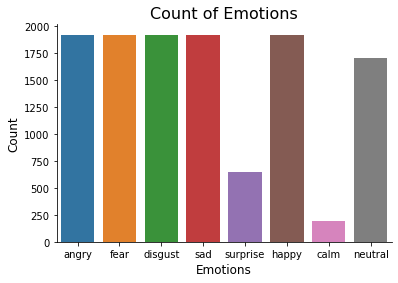

In [8]:
#Creating a plot to count the data in each unique emotion.

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(Finaldataset.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Data Augmentation 

In [9]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display

def noise(sample):
    noise_amp = 0.035*np.random.uniform()*np.amax(sample)
    sample = sample + noise_amp*np.random.normal(size=sample.shape[0])
    return sample

def stretch(sample, rate=0.8):
    return librosa.effects.time_stretch(sample, rate)

def shift(sample):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(sample, shift_range)

def pitch(sample, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(sample, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(Finaldataset.Path)[1]
sample, sample_rate = librosa.load(path)

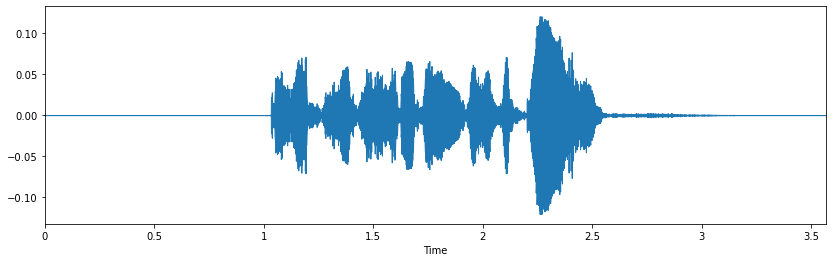

In [10]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=sample, sr=sample_rate)
Audio(path)

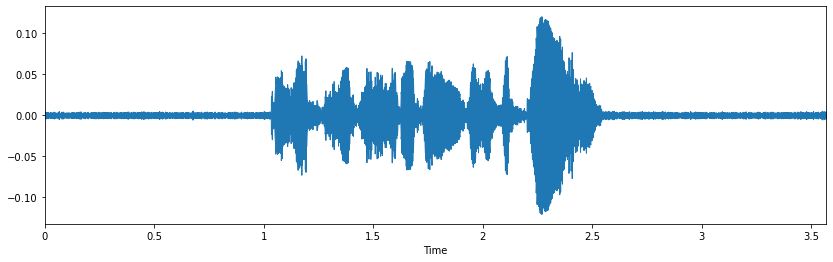

In [11]:
x = noise(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

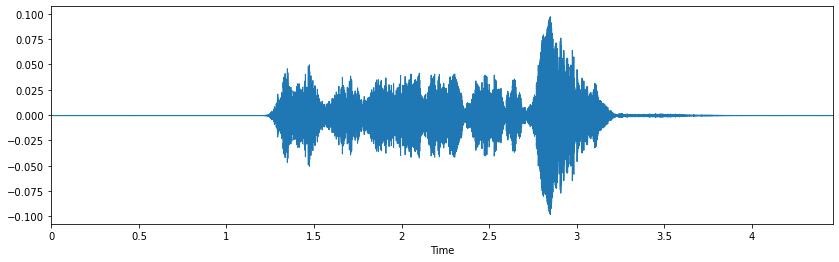

In [12]:
x = stretch(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

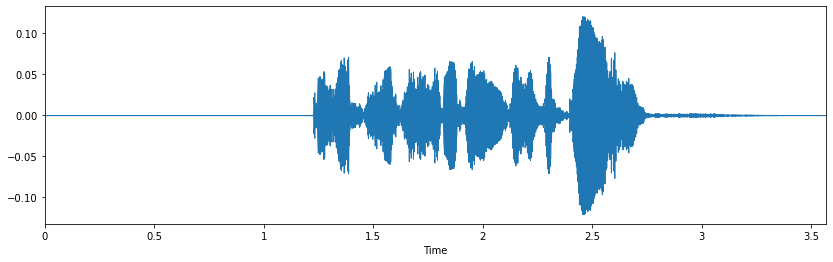

In [13]:
x = shift(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

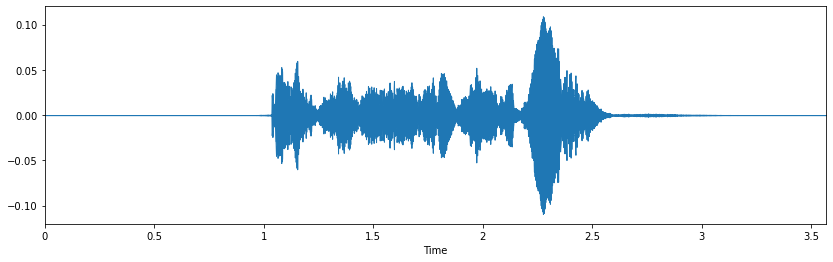

In [14]:
x = pitch(sample, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

###  Feature Extrction


In [16]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display
import librosa.feature

def extract_features(sample):
    # ZCR
    result = np.array([])
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=sample).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(sample))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=sample).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    sample, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(sample)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(sample)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(sample)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(Finaldataset.Path, Finaldataset.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print(X)

In [ ]:
len(X), len(Y), Finaldataset.Path.shape

In [ ]:
import pandas as pd.DataFrame

Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()